In [16]:
# you may need to install networkx with pip
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import networkx as nx
import colorsys


In [17]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
display(df)
display(df.columns)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [18]:
def labelCalories(amount):
    if 0 <= amount < 500:
        return "Small"
    elif 500 <= amount < 1200:
        return "Medium"
    else:
        return "Large"

In [19]:
df['Calories'] = df['Calories_Burned'].apply(labelCalories)
display(df)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,Large
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Medium
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Medium
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Medium
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77,Large
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69,Large
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50,Medium
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74,Medium


### Age, Fat_Percentage, Height (m), 'Weight (kg)

C:\Users\layto\AppData\Local\Temp\ipykernel_14004\1452640092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[['Age', 'Gender', 'Weight (kg)', 'Height (m)','Avg_BPM',


<Axes: >

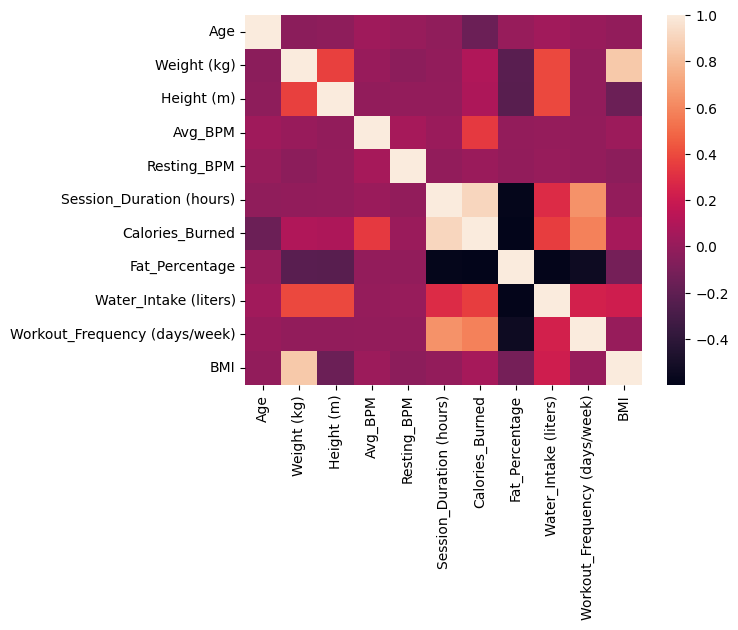

In [20]:
corr = df[['Age', 'Gender', 'Weight (kg)', 'Height (m)','Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)','BMI', 'Calories']].corr(min_periods=15) #  'Max_BPM',  'Experience_Level', 
sns.heatmap(corr)

In [21]:
# Age, Fat_Percentage, Height (m), 'Weight (kg)
X = df.drop(['Gender','Avg_BPM','Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
             'Workout_Type', 'Water_Intake (liters)', 'Workout_Frequency (days/week)','BMI', 'Calories'],axis=1)
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.35351748,  0.22003553, -1.57793557, -0.59379946,  1.07584271,
         0.23871502],
       [-0.69168182, -0.58623752, -1.57793557, -0.15874438, -0.84659213,
         1.57735539],
       [ 0.21834222, -0.50136668, -1.04065625, -1.55092064, -1.53546462,
         1.57735539],
       ...,
       [-0.5262229 ,  0.65381987,  1.18521524, -0.59379946, -2.11219507,
         1.57735539],
       [-1.51897639,  0.42278256,  0.57118172, -1.11586556,  0.77145719,
        -1.09992536],
       [ 0.96290733,  0.75283586, -0.19636017, -1.02885454, -0.30190226,
        -1.09992536]])

In [23]:
def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    


In [ ]:
def makeNetwork(hiddenLayer):
    # mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=500)
    mlp = MLPClassifier(hidden_layer_sizes=hiddenLayer,max_iter=50000)
    mlp.fit(X_train,y_train)
    predictions = mlp.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
    print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
    print('The layers have the following number of coefficients: {}')
    for l in range(len(mlp.coefs_)):
        m = len(mlp.coefs_[l])
        n = len(mlp.coefs_[l][0])
        print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
    # Print the actual coefficients
    # print(mlp.coefs_)

    print()
    print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
    print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))
    show_ann(mlp)

[[ 17   9   0]
 [ 17 172   5]
 [  0  23   1]]
              precision    recall  f1-score   support

       Large       0.50      0.65      0.57        26
      Medium       0.84      0.89      0.86       194
       Small       0.17      0.04      0.07        24

    accuracy                           0.78       244
   macro avg       0.50      0.53      0.50       244
weighted avg       0.74      0.78      0.75       244



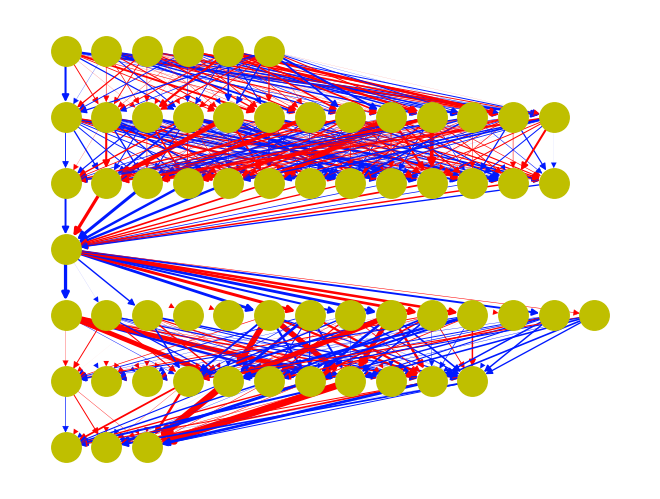

In [25]:
makeNetwork((13, 13, 1, 14, 11))

[[ 16  10   0]
 [ 16 163  15]
 [  0  17   7]]
              precision    recall  f1-score   support

       Large       0.50      0.62      0.55        26
      Medium       0.86      0.84      0.85       194
       Small       0.32      0.29      0.30        24

    accuracy                           0.76       244
   macro avg       0.56      0.58      0.57       244
weighted avg       0.77      0.76      0.76       244



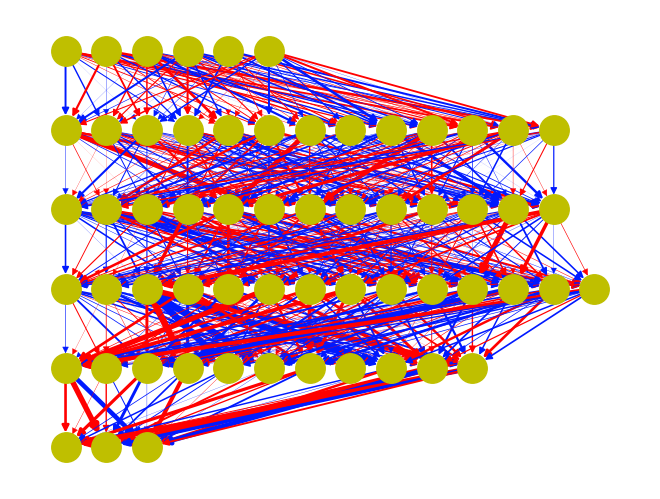

In [26]:
makeNetwork((13, 13,14, 11))

[[ 13  13   0]
 [ 13 164  17]
 [  0  21   3]]
              precision    recall  f1-score   support

       Large       0.50      0.50      0.50        26
      Medium       0.83      0.85      0.84       194
       Small       0.15      0.12      0.14        24

    accuracy                           0.74       244
   macro avg       0.49      0.49      0.49       244
weighted avg       0.73      0.74      0.73       244



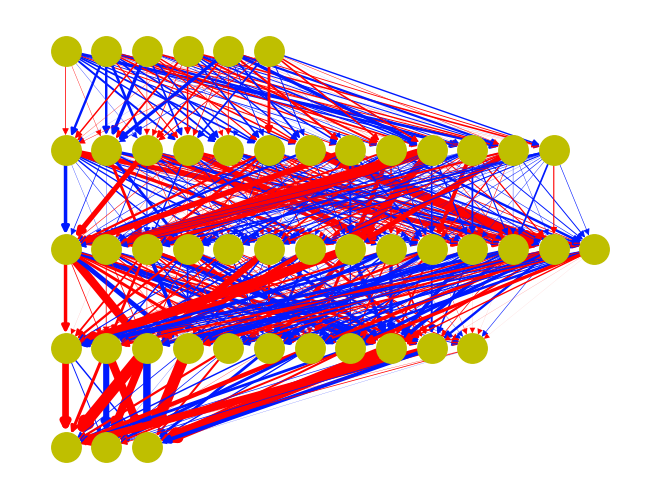

In [27]:
makeNetwork((13, 14, 11))

[[ 16  10   0]
 [ 14 170  10]
 [  0  22   2]]
              precision    recall  f1-score   support

       Large       0.53      0.62      0.57        26
      Medium       0.84      0.88      0.86       194
       Small       0.17      0.08      0.11        24

    accuracy                           0.77       244
   macro avg       0.51      0.53      0.51       244
weighted avg       0.74      0.77      0.75       244



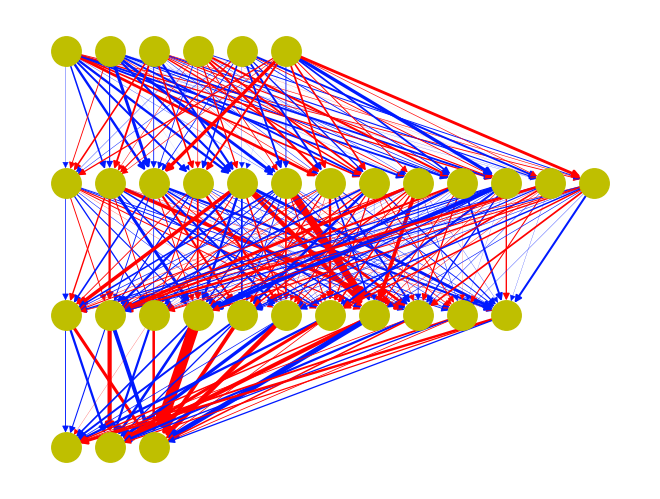

In [28]:
makeNetwork((13, 11))

[[ 14  12   0]
 [ 10 168  16]
 [  0  18   6]]
              precision    recall  f1-score   support

       Large       0.58      0.54      0.56        26
      Medium       0.85      0.87      0.86       194
       Small       0.27      0.25      0.26        24

    accuracy                           0.77       244
   macro avg       0.57      0.55      0.56       244
weighted avg       0.76      0.77      0.77       244



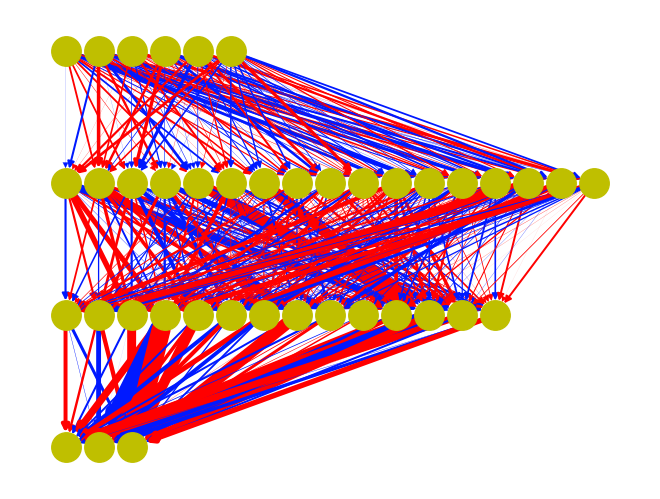

In [29]:
makeNetwork((17, 14))